In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
M = 50
Nodes = [1,2,3,4,5]
Demand = [-20,-10,11,2,17]
Directed_Edges = [(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)]
Cost_Capacity_Edges = [(1,M),(6,M),(3,M),(7,M),(3,M),(1,M)]

def min_cost_transhipment(Nodes,Demand,Directed_Edges,Cost_Capacity_Edges,M,draw=False):
    G = nx.DiGraph()
    Node_Demand = dict(zip(Nodes,Demand))
    Directed_Edges_Cost_Capacity = dict(zip(Directed_Edges,Cost_Capacity_Edges))
    Demand_nodes = []
    Supply_nodes = []
    for i in Nodes:
        if i < 0:
            Supply_nodes.append(i)
        else:
            Demand_nodes.append(i)

    for i in Nodes:
        G.add_node(i, demand = Node_Demand[i])

    for k in Directed_Edges:
        i,j = k
        cost,cap = Directed_Edges_Cost_Capacity[k]
        G.add_edge(i, j, weight = cost, capacity = cap)

    flowDict = nx.min_cost_flow(G)
    
    if draw == True:
        pos=nx.shell_layout(G)
        nx.draw_networkx_nodes(G,pos,
                               nodelist=Supply_nodes,
                               node_color='blue',
                               node_size=400,
                           alpha=0.9)

        nx.draw_networkx_nodes(G,pos,
                               nodelist=Demand_nodes,
                               node_color='r',
                               node_size=150,
                           alpha=0.3)

        nx.draw_networkx_edges(G,pos,
                               edgelist=Directed_Edges,
                               width=1.5,alpha=0.5,edge_color='g')

        plt.show()
    
    return flowDict

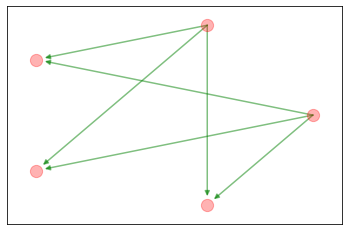

{1: {3: 11, 4: 0, 5: 9}, 2: {3: 0, 4: 2, 5: 8}, 3: {}, 4: {}, 5: {}}

In [10]:
min_cost_transhipment(Nodes,Demand,Directed_Edges,Cost_Capacity_Edges,M,draw=True)